# Predicting the Size and Impact of California Wildfires 
Andreas Hindman, Oscar Avatare, Saurav Kharb, Sharan Jhangiani


## Purpose

Recent media coverage seems to echo the nation's growing concern over the impact of wildland fires. Cumulatively, the top 10 fires in California have set aflame to millions of acres and damages thousands of structures.<sup>1</sup> Depending on their location, some of the larger California wildland fires have claimed the lives of dozens. In mid-November of 2018, the _Camp Fire_ in northern California killed 85 people.<sup>2,6</sup> The alarming death tolls alone provide enough reason to attempt to predict the potential impact of wildland fires. Environmental and economic damages are also a concern for homeowners, residents, insurers, governments, and nearby communities. For these reasons, it is no surprise that efforts to predict the behavior and effects of wildfires have already been made.

A 2016 report by the U.S. Fire Administration shows a general decrease in fire-related death trend.<sup>3</sup> This could be attributed to advancements in predictive and preventative technology, medical technology and techniques, or safer construction regulations/guidelines. However, previous attempts at predicting the behavior of wildfires have suffered from a lack of funding. This means that the practical applications of the models described in literature are lacking.<sup>4</sup> Additionally, much of this research (and it's associated models) pre-dates the scientific research showing that "wildfire activity increased suddenly and markedly in the mid-1980s, with higher large-wildfire frequency, longer wildfire durations, and longer wildfire seasons." — In fact, wildfire activity in the Western United States forests is thought to have increased in recent decades due to "increased spring and summer temperatures and an earlier spring snowmelt."<sup>5</sup> 

_The devastating and unpredictable nature of wildfires puts the lives of thousands of homeowners, firefighters, respondents, at risk._

The purpose of this project is to better predict the size of wildfires in California. Due to the changing climate, the problems caused by wildfires in the western United States and California specifically are more pertinent than ever.<sup>5</sup> Accurate prediction models will allow communities to evacuate individuals and families at the appropriate time and place. This project limits the scope of the models to California wildfires, but the features used by the model are not specific the region. These models and techniques could be applied to any geographical locations that experience wildfires, assuming similar data is attainable. Models or technologies that provide accurate information regarding where and when to deploy containment efforts will have the potential to save hundreds, if not thousands, of lives.


1. https://www.iii.org/fact-statistic/facts-statistics-wildfires
2. https://www.theguardian.com/us-news/video/2018/nov/13/camp-fire-deadliest-wildfire-california-history-video-report 
3. https://www.usfa.fema.gov/data/statistics/fire_death_rates.html 
4. https://www.fs.fed.us/rm/pubs_series/int/gtr/int_gtr030.pdf
5. http://science.sciencemag.org/content/313/5789/940 
6. https://www.usatoday.com/story/news/2018/12/03/camp-fire-death-toll-california-deadliest-wildfire/2199035002/

## Exploring the Data
Our primary [data source](https://www.fs.usda.gov/rds/archive/Product/RDS-2013-0009.4/) for wildfire related data contains records of 1.88 Million U.S. wildfires from the United States Department of Agriculture's Forest Service. This data publication contains a spatial database of wildfires that occurred in the United States from 1992 to 2015. It is the third update of a publication originally generated to support the national Fire Program Analysis (FPA) system. The wildfire records were acquired from the reporting systems of federal, state, and local fire organizations.

To suppliment our models, we also used California climate data that was [requested](https://www.ncdc.noaa.gov/cdo-web/orders?email=skharb@uw.edu&id=1562545) from NOAA. This curated dataset contains various features related to temperature, precipitation, humidity, snowfall, and other climate variables for California in 2010. We joined these two datasets on longitude/latitude so that features from both could be used to predict fire size. A smaller dataset that contains the relevant subset of joined data that is used for our models can be found in our GitHub [repository](https://github.com/sjhangiani12/info370-final-project/tree/master/data). A link to a more detailed Jupyter notebook containing our data preparation process can be found [here](https://github.com/sjhangiani12/info370-final-project/blob/master/Data%20Prep.ipynb).

### Missing Values
Missing values are scattered (mostly) randomly throughout the dataset with the exception of certain climate variables, some of which contain mostly missing values. These missing values could impact the statistical models if they mask any correlation. One option to handle these is to remove rows with missing values entirely. However, this would result in most of our rows being deleted. As long as an insignificant portion of the rows contain missing values, the models should not be affected dramatically. In an effort to maximize our effective data and to limit the scope of the project, we used a subset of the dataset that had sufficient data. Some years have a higher proportion of missing values, which can be seen below.

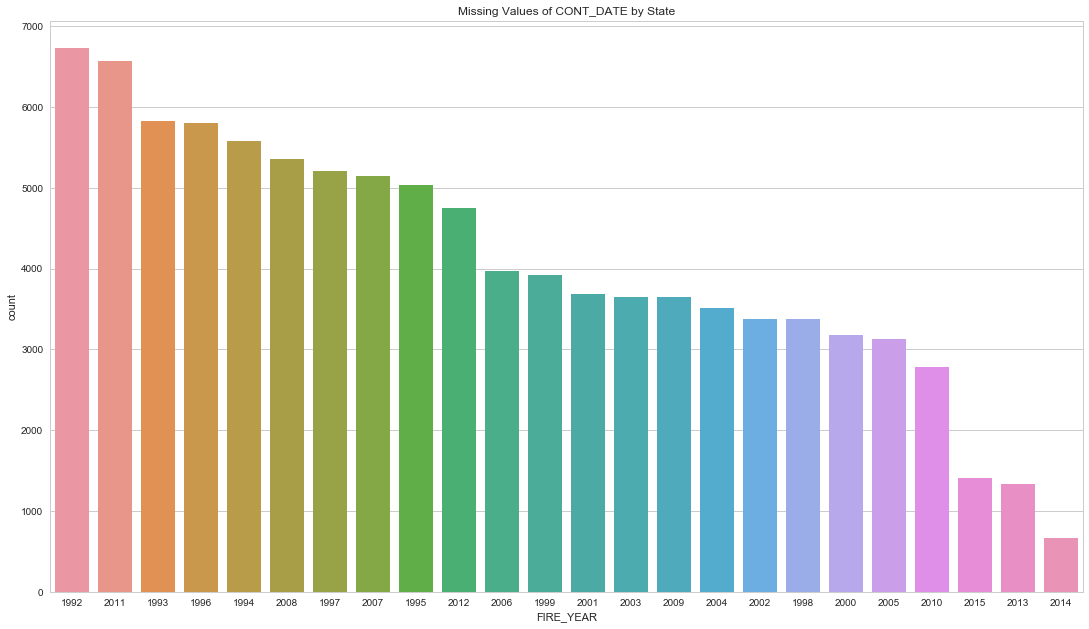

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read the relevant subset of data
fires = pd.read_csv('data/california_fires.csv')

# select rows where date value is null
no_date_fires = fires[fires['CONT_DATE'].isnull()]

sns.set(style="whitegrid")
g = sns.countplot(pd.Series(no_date_fires.FIRE_YEAR), order = pd.Series(no_date_fires.FIRE_YEAR).value_counts().index).set_title('Missing Values of CONT_DATE by State')
g.figure.set_size_inches(18.5, 10.5)

Since we were able to get geographical climate data for 2010, and since 2010 had relatively few missing values, we only used the 2010 subset of wildfire data. After that, we used recursive feature elimination (RFE) to determine the most effective set of features. Then, we cross-referenced the top features with the set of columns based on the proportion of missing values. Of the top features that were selected by RFE, the highest proportion of missing values was 0.22, so we removed climate features that had more than 25% missing values.

View the [modelling notebook](https://github.com/sjhangiani12/info370-final-project/blob/master/Modelling.ipynb) in the repository explore this process in more detail.

### Features
"A nuanced understanding of the important features of the dataset and topic is demonstrated."

In [15]:
len(fires)

189550

### Insights
"High-level insights (important descriptive information, major trends, notable outliers, etc.) should be prominent in your resource."

## Technical Models
K-nearest neighbours is a non-parametric method used for classification and regression. In this case, we would be using knn regression to find an outcome (fire size) that is the average of the values of its k-nearest neighbours. The input in a knn model consists of k closest training examples in the feature space. We would also be using feature scaling - a useful technique can be used to assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. A link to a more detailed Jupyter notebook containing our modelling process can be found [here](https://github.com/sjhangiani12/info370-final-project/blob/master/Data%20Prep.ipynb).

## Results
"Methods and results of statistical approaches are clear"


### TODO:
##### 10pts: Properly Frame Project
The purpose of the project, source of the data, and any pertinent information about the topic area are introduced. You may also want to include links to the code, or information about the team.

##### 20pts: Clear and concise explanations
Clear and concise text conveys pertinent descriptions of the approach and relevant insights.

##### 30pts: Visual Representations
Visual representations of the data are used to answer research questions of interest. Graphics follow basic visualization principles (loosely), and there is strong attention to detail (labels, hover info, etc.).

##### 30pts: Data Analysis
The data analysis strategy is appropriate and clearly communicated

##### 10pts: Code Quality
Code is well organized, easy to read, well commented.